
--- Step 3: Determine the Number of Components ---
Estimating the optimal number of independent components (n_components) for ICA.
PCA's explained variance can help determine a reasonable number of components.

3.1. Data scaled using StandardScaler for PCA.

3.3. Explained Variance by each Principal Component:
PC 1: 0.3620
PC 2: 0.1921
PC 3: 0.1112
PC 4: 0.0707
PC 5: 0.0656
PC 6: 0.0494
PC 7: 0.0424
PC 8: 0.0268
PC 9: 0.0222
PC 10: 0.0193
PC 11: 0.0174
PC 12: 0.0130
PC 13: 0.0080


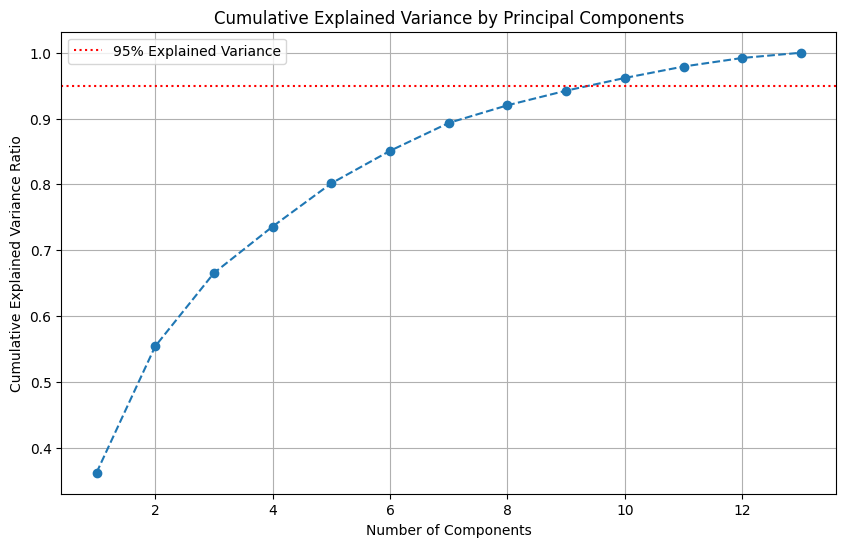


Number of components to explain 95% variance: 10


In [1]:
#if you want a more statistical approach use parallel analysis.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler # For data scaling
from sklearn.decomposition import PCA # For determining optimal n_components for ICA

# Re-load data to ensure df is available if running snippet independently
wine = load_wine()
X = wine.data
df = pd.DataFrame(X, columns=wine.feature_names)

# --- Step 3: Determine the Number of Components ---

print("\n--- Step 3: Determine the Number of Components ---")
print("Estimating the optimal number of independent components (n_components) for ICA.")
print("PCA's explained variance can help determine a reasonable number of components.")

# 3.1. Standardize the data before PCA
# Scaling is crucial for PCA as it is sensitive to feature scales.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
print("\n3.1. Data scaled using StandardScaler for PCA.")

# 3.2. Apply PCA to find explained variance for all components
pca = PCA(n_components=None) # Keep all components initially
pca.fit(X_scaled)

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

print("\n3.3. Explained Variance by each Principal Component:")
# Interpretation: Shows the proportion of total variance explained by each PC.
# Look for where the gain in explained variance significantly diminishes.
for i, var_ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC {i+1}: {var_ratio:.4f}")

# 3.4. Plot Explained Variance to find the "elbow"
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle=':', label='95% Explained Variance') # Optional: target explained variance
plt.legend(loc='best')
plt.show()

# Interpretation of the plot:
# Look for an "elbow" point where the curve sharply changes direction and then flattens out.
# This elbow suggests a good number of components to retain, as adding more components past this point
# provides diminishing returns in terms of explained variance.
# For example, if the elbow is at 5 components, it suggests that 5 underlying factors might explain
# most of the variance in the data.
# Alternatively, choose the number of components that explain a high percentage of variance (e.g., 90-95%).
# For the Wine dataset, an elbow might be visible around 3-4 components, or we might target 95% variance
# which is achieved by a certain number of components as seen from the plot.

# You can also programmatically find components for a certain explained variance:
n_components_95_var = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"\nNumber of components to explain 95% variance: {n_components_95_var}")
# Interpretation: This gives a data-driven suggestion for 'n_components'.
# For ICA, this number can be used as a starting point. Often, domain knowledge or specific problem
# requirements might also influence the final choice of n_components.
# For the Wine dataset, 95% variance is covered by about 8 components. This suggests that the
# inherent dimensionality of the data, considering its linear variability, is around 8.
# This number can be a good 'n_components' value to try for ICA, or a slightly lower number if
# we suspect fewer truly independent sources.

# Based on the plot and 95% variance target, let's tentatively select n_components for ICA.
# For simplicity, let's target about 8 components, which covers ~95% variance.
# However, ICA often aims for fewer components representing 'sources', so a smaller number
# like 3 or 4 (corresponding to the wine classes or general categories) might also be sensible
# to explore, depending on what kind of independent sources we expect.
# For the purpose of this demonstration, let's choose a number that captures a good amount of variance
# but also allows for clear interpretation of independent components. Let's stick to the 95% rule for now.
# We will use 'n_components_95_var' as our chosen number for the next step.